#**ANALYTICAL QUESTION**

What key factors can be identified as the primary contributors to differences in life expectancy across countries?

##**DATA CARD**

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

Country : Country

Year : Year

Status : Country Developed or Developing status

Life expectancy : Life expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population

Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) -percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (%)

thinness 5-9 years : Prevalence of thinness among children for Age 5 to 9(%)

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)


##1. **INTRODUCTION**


This notebook focuses on life expectancy, to identify the critical factors influencing it and exploring variations across demographic groups, specifically countries.




Firstly, we'll connect to Google Drive and import the necessary libraries.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

## 2. **DATA PRE-PROCESSING AND ANALYSIS**

Examining the initial rows of the dataset is important for understanding the data format and identifying included data types. This step aids in formulating the chosen analytical question. Additionally, utilizing the '.shape' function offers insights into the dataset's size, indicating the number of rows and columns. Further exploration involves using 'df.describe' to gain a statistical overview and 'df.info' to obtain details about columns, non-null counts, and data types.

In [ ]:
df = pd.read_csv("Life Expectancy Data.csv")

In [ ]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [ ]:
df.shape

(2938, 22)

We have 2938 rows and 22 columns.


###2.1 **DATA CLEANING**

we will perform data cleaning by checking and replacing missing values and removing extra spaces. This is to ensuring that the data is in a suitable and consistent format for further analysis.

In [ ]:
#Check for missing values
df.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Given the presence of a significant number of missing values, discarding them may not be the best approach. Instead, a more appropriate strategy would be to replace these missing values with the mean, which is more appropriate for the nature of this analysis.


In [ ]:
#Remove unnecessary spaces
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
#Replace the missing values with the mean of each respective column

COLS =['Life expectancy', 'Adult Mortality','Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

df[COLS]= df[COLS].fillna(df[COLS].mean())

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

We can see that the missing values have been filled successfully.


###2.2 **EXPLORATORY DATA ANALYSIS (EDA)**

We will perform exploratory data analysis to gain insights into the dataset's structure, investigate relationships between variables, and identify potential patterns related to our target column, Life Expectancy.


Text(0.5, 1.0, 'Histogram of Life Expectancy')

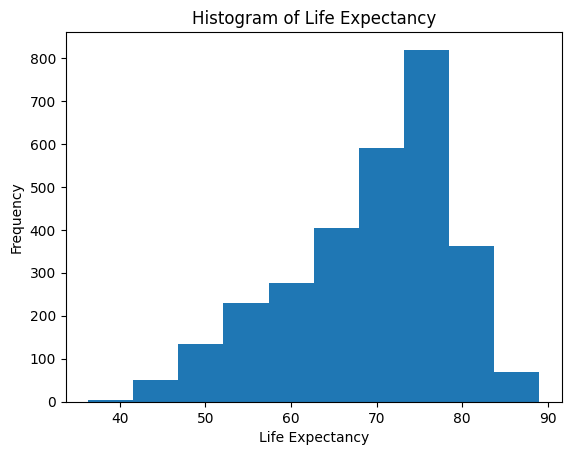

In [ ]:
#Visualise how life expectancy is distributed
LE = df['Life expectancy']
plt.hist(LE)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Histogram of Life Expectancy')


We examine the life expectancy distribution, observing an ascending trend from 40 to 70, reaching a peak between 75 and 78 marked by the highest frequency of 800. Subsequently, there is a decline from 80. This observation suggests that a significant portion of life expectancy values falls within the range of 75 to 78.

Lets examine the years in this dataset

In [ ]:
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

Our dataset covers the years 2000 to 2015 and spans a period of 16 years. Let's visualise the average life expectancy for each year


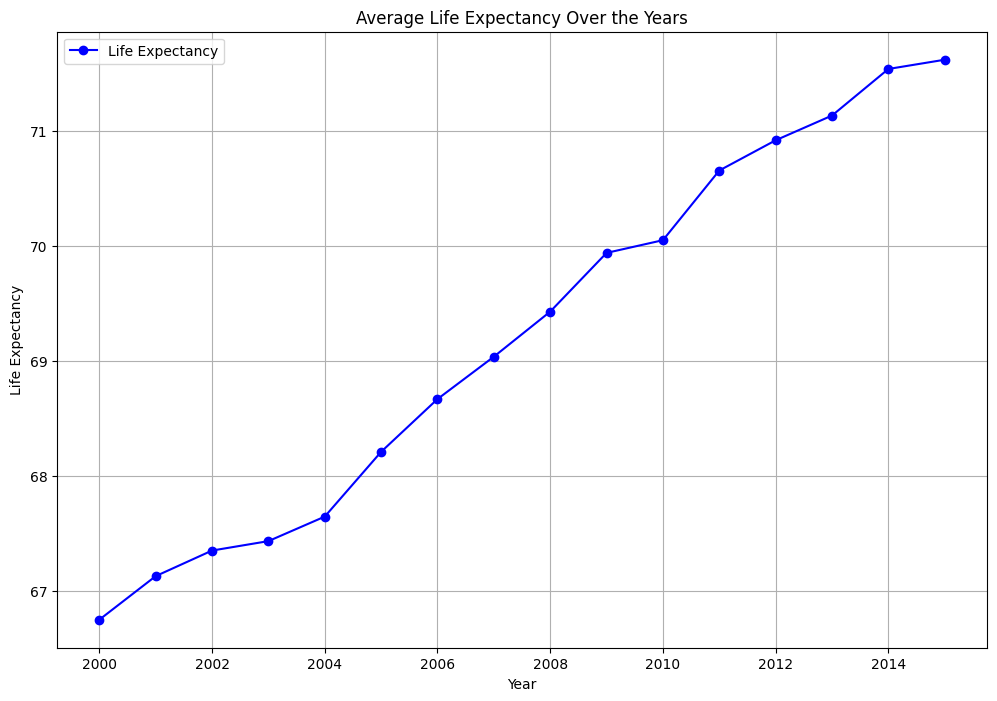

In [ ]:

# Group the DataFrame by 'Year' and calculate the mean for 'Life expectancy'
longitudinal_data = df.groupby('Year')['Life expectancy'].mean()

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot the 'Life expectancy' over the years
plt.plot(longitudinal_data.index, longitudinal_data.values, marker='o', linestyle='-', color='b', label='Life Expectancy')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Average Life Expectancy Over the Years')
plt.legend()
plt.grid(True)


Examining the 'Country' column, to determine both the total number of unique countries present in our dataset and which countries are specifically included.


In [ ]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [ ]:
df['Country'].nunique()

193

There are 193 countries in this dataset. Visualising all 193 countries can be overwhelming and difficult to interpret. Streamlining this to focus on the top 10 and bottom 10 will facilitate clearer and better visualizations.

Visualizing the average life expectancy according to economic status will provide insights into the potential impact of economic conditions on life expectancy.

In [ ]:
# Calculate average life expectancy based on different demographic groups
aveg_gender = df.groupby('Status')['Life expectancy'].mean()
aveg_gender


Status
Developed     79.197852
Developing    67.120177
Name: Life expectancy, dtype: float64

Text(0.5, 1.0, 'Average Life Expectancy by Status')

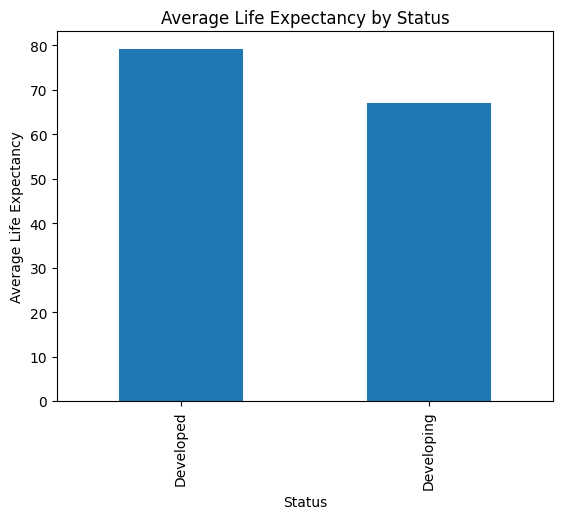

In [ ]:
# Visualize the results
aveg_gender.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Status')

The average life expectancy in developing countries is 67, while it is 79 in developed countries. This 12-year difference highlights a significant difference in life expectancy between the two economic groups. The data suggests that people in developed countries live longer lives, emphasising the potential influence of economic factors on overall life expectancy.


Now that we understand the impact of economic status on life expectancy, let's look at how countries are distributed within each status category.


In [ ]:
grouped_data = df.groupby('Status').agg({'Country': 'count', 'Life expectancy': 'mean'}).reset_index()
grouped_data

Status  Country  Life expectancy
0   Developed      512        79.197852
1  Developing     2426        67.120177

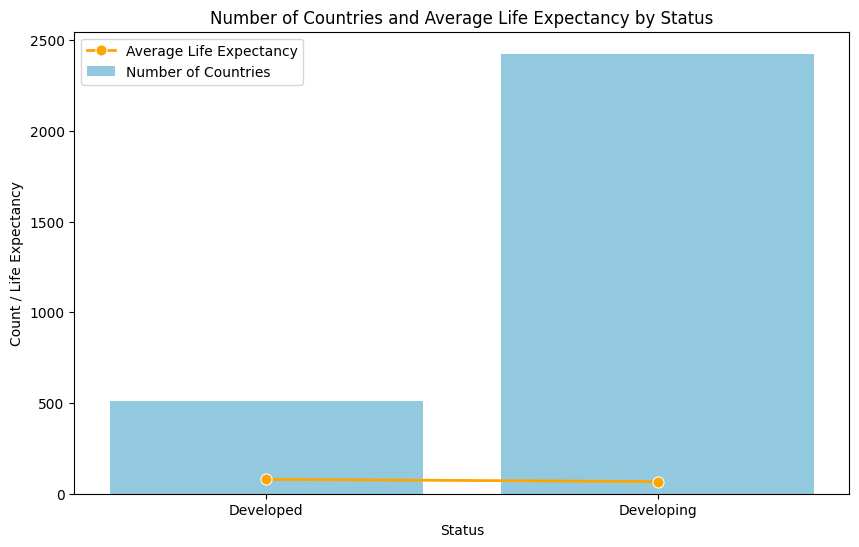

In [ ]:
# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Status', y='Country', data=grouped_data, color='skyblue', label='Number of Countries')
sns.lineplot(x='Status', y='Life expectancy', data=grouped_data, marker='o', color='orange', linewidth=2, markersize=8, label='Average Life Expectancy')
plt.xlabel('Status')
plt.ylabel('Count / Life Expectancy')
plt.title('Number of Countries and Average Life Expectancy by Status')
plt.legend()

There are 512 countries in the developed status category and 2426 countries in the developing status category. This disparity in numbers suggests a significant difference in countries' economic development, with a larger proportion falling into the developing category.



Determining the top 10  countries with the highest life expectancy, then visualizing their trends over the years to extract valuable insights.

In [ ]:
# Calculate average life expectancy for each country across all years
avg = df.groupby('Country')['Life expectancy'].mean()

# The top 10 countries with highest average life expectancy
avgH = avg.nlargest(10)

print("Top 10 countries with highest average life expectancy:")
avgH

Top 10 countries with highest average life expectancy:


Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Canada         81.68750
Name: Life expectancy, dtype: float64

In [ ]:
# Calculate average life expectancy for each country across all years
avg = df.groupby('Country')['Life expectancy'].mean()

# The top 10 countries with highest average life expectancy
avgH = avg.nlargest(10).index

top_countries_data = df[df['Country'].isin(avgH)][['Country', 'Status']].drop_duplicates()

# Display the table
print("Top 10 Countries with Highest Average Life Expectancy and Status:")
top_countries_data


Top 10 Countries with Highest Average Life Expectancy and Status:


Country      Status
112     Australia   Developed
496        Canada  Developing
930        France  Developing
1170      Iceland   Developed
1282        Italy   Developed
1314        Japan   Developed
1910       Norway   Developed
2425        Spain   Developed
2505       Sweden   Developed
2521  Switzerland   Developed

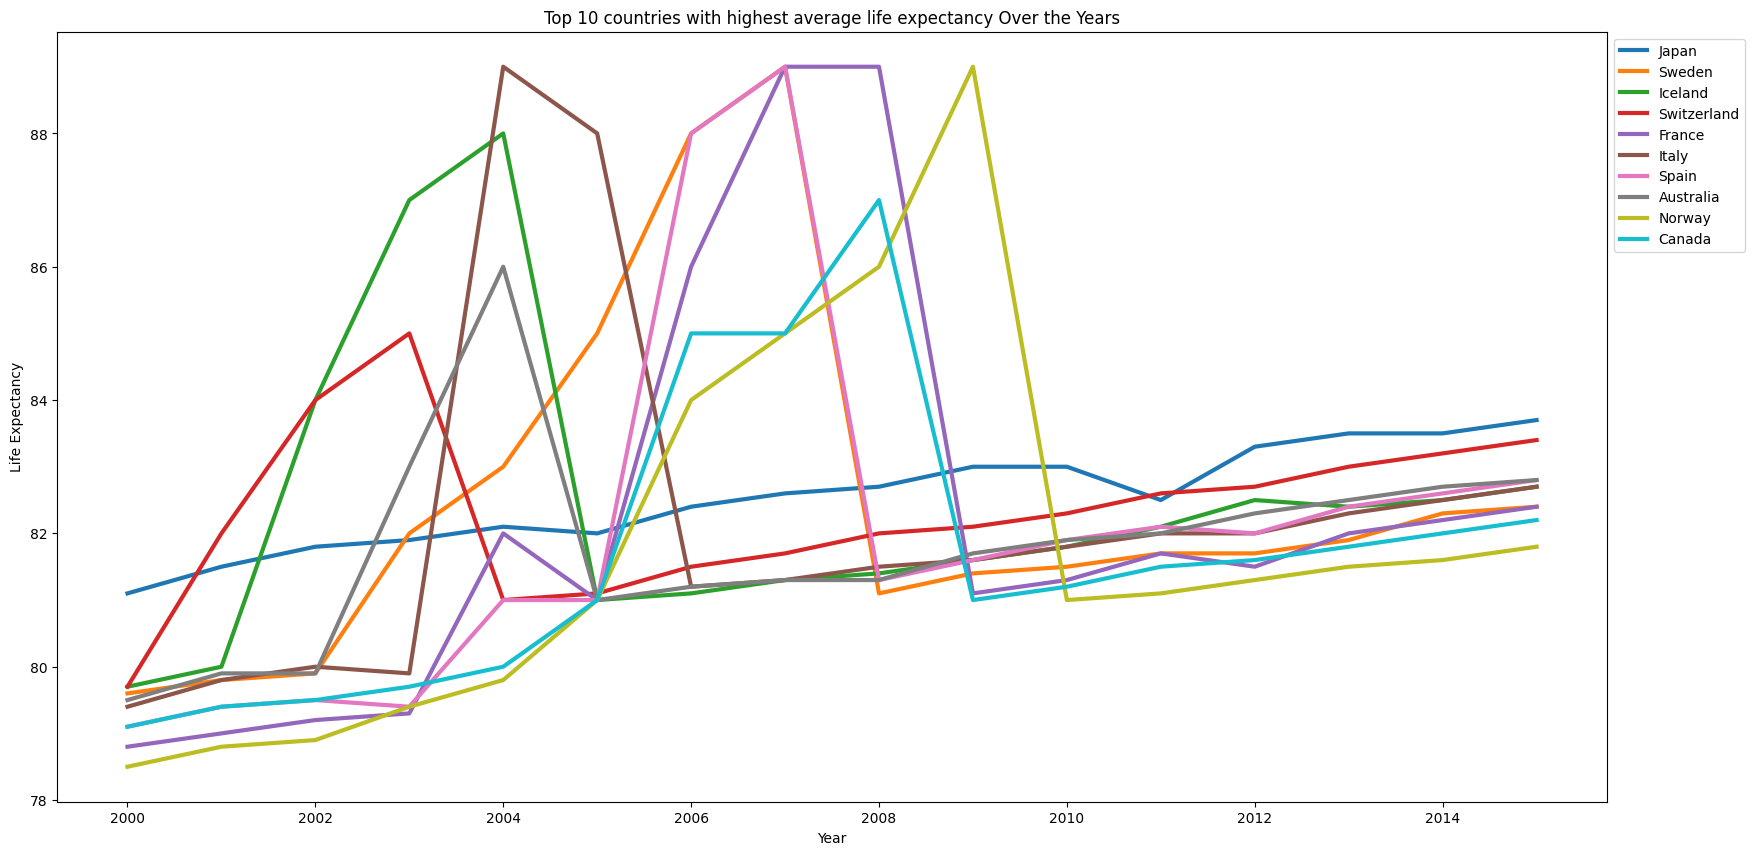

In [ ]:
# List of selected countries
selected_countries = ['Japan', 'Sweden', 'Iceland', 'Switzerland', 'France', 'Italy', 'Spain', 'Australia', 'Norway', 'Canada' ]

# Set up the figure and axis
plt.figure(figsize=(20, 10))

# Loop through selected countries and plot line plots
for country in selected_countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy'], label=country, linewidth=3)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Top 10 countries with highest average life expectancy Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


According to the graph above, Japan has a more consistent and stable life expectancy trend than other countries. Japan has the highest life expectancy among the countries studied in 2015. Other countries, on the other hand, have fluctuations in different years:
- Sweden and Spain peak in 2007 but fall in 2008
- Iceland peaks in 2004 but falls in 2005
- Switzerland peaks in 2003 but falls in 2004
- France peaks in 2007 and 2008 before falling in 2009
-Italy peaks in 2003 and falls in 2006
-  Australia peaks in 2004 but falls in 2005
-  Norway peaks in 2009 but falls in 2010, the lowest among the countries.
- Canada reaches a high in 2008 but then drops in 2009.

This demonstrates the variation in life expectancy trends across the countries studied. Japan stands out for its relatively stable trajectory, whereas other countries exhibit fluctuations, emphasising the importance of investigating the factors influencing these patterns.




Visualising the effect of GDP on countries with the highest life expectancy to determine whether there is a positive or negative relationship.


GDP  Life expectancy
Country                                   
Japan        24892.544784         82.53750
Sweden       29334.990639         82.51875
Iceland      30159.502907         82.44375
Switzerland  57362.874601         82.33125
France       26465.551381         82.21875
Italy        21234.782371         82.18750
Spain        17093.459737         82.06875
Australia    34637.565047         81.81250
Norway       27434.946928         81.79375
Canada       29382.907523         81.68750

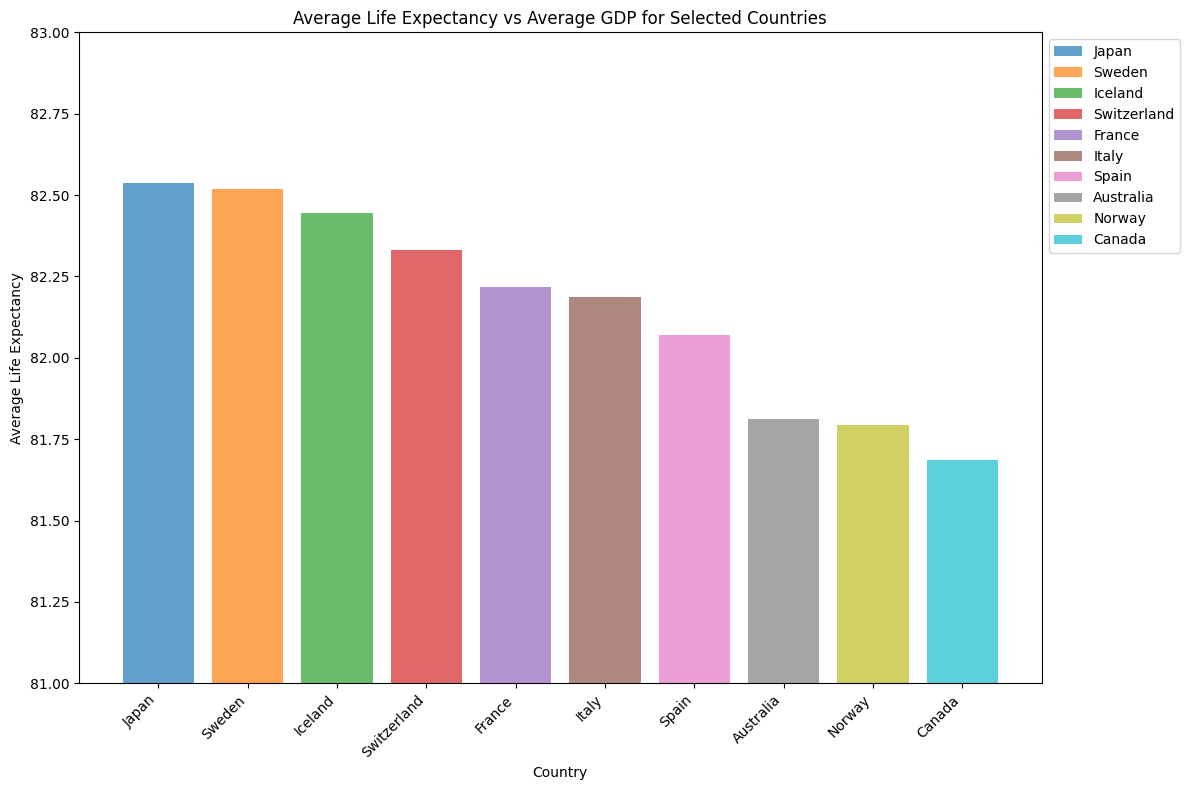

In [ ]:
# List of selected countries
selected_countries =  ['Japan', 'Sweden', 'Iceland', 'Switzerland', 'France', 'Italy', 'Spain', 'Australia', 'Norway', 'Canada' ]

# Filter data for selected countries
selected_data = df[df['Country'].isin(selected_countries)]

# Calculate average GDP for each country
average_gdp = selected_data.groupby('Country')['GDP'].mean().reset_index()

# Sort the DataFrame by 'Life expectancy' in descending order
sorted_data = selected_data[['Country', 'GDP', 'Life expectancy']].groupby('Country').mean().sort_values(by='Life expectancy', ascending=False)

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Loop through selected countries and plot bar chart
for country in sorted_data.index:
    country_average_gdp = average_gdp[average_gdp['Country'] == country]['GDP'].values[0]
    country_data = selected_data[selected_data['Country'] == country]
    plt.bar(country,
            country_data['Life expectancy'].mean(),
            label=country, alpha=0.7)

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy vs Average GDP for Selected Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim(81, 83)  # Set y-axis limits
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()


# Print the sorted DataFrame
sorted_data


The relationship between GDP and life expectancy for various countries is shown in this table and graph. According to observations, countries with higher GDPs, such as Switzerland and Australia, have longer life expectancies. Notably, despite having a lower GDP than some other countries, Japan has a relatively high life expectancy. In several cases, there is a positive correlation between GDP and life expectancy, implying a possible link between economic prosperity and longer life spans. However, the complex interplay of numerous factors influencing life expectancy necessitates further investigation for a complete understanding.


Determining the top 10 countries with the lowest life expectancy, then visualizing their trends over the years to extract valuable insights.

In [ ]:
# Calculate average life expectancy for each country across all years
avg = df.groupby('Country')['Life expectancy'].mean()

# Find top 10 countries with lowest average life expectancy
avgL = avg.nsmallest(10)

# Display the table
print("Top 10 countries with lowest average life expectancy:")
avgL

Top 10 countries with lowest average life expectancy:


Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life expectancy, dtype: float64

In [ ]:
# Calculate average life expectancy for each country across all years
avg = df.groupby('Country')['Life expectancy'].mean()

# The top 10 countries with lowest average life expectancy
avgL = avg.nsmallest(10).index

top_countries_data = df[df['Country'].isin(avgL)][['Country', 'Status']].drop_duplicates()

# Display the table
print("Top 10 Countries with Lowest Average Life Expectancy and Status:")
top_countries_data


Top 10 Countries with Lowest Average Life Expectancy and Status:


Country      Status
48                      Angola  Developing
432              Côte d'Ivoire  Developing
512   Central African Republic  Developing
528                       Chad  Developing
1474                   Lesotho  Developing
1570                    Malawi  Developing
1893                   Nigeria  Developing
2297              Sierra Leone  Developing
2489                 Swaziland  Developing
2922                  Zimbabwe  Developing

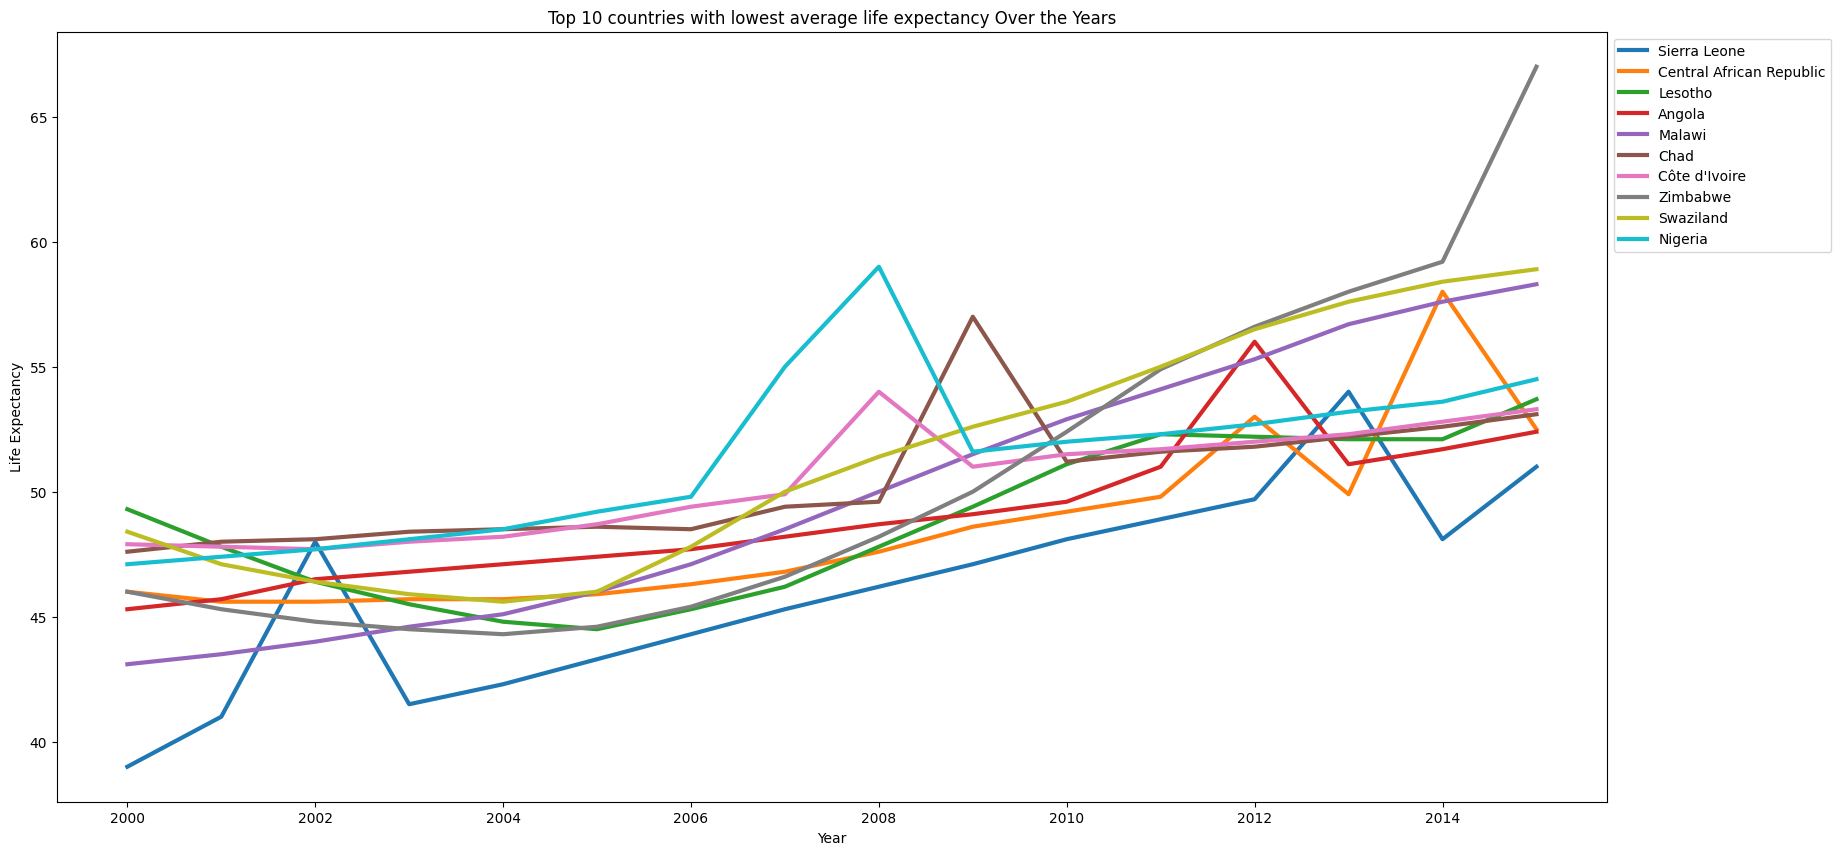

In [ ]:
# List of selected countries
selected_countries = ['Sierra Leone', 'Central African Republic', 'Lesotho', 'Angola', 'Malawi', 'Chad', "Côte d'Ivoire", 'Zimbabwe', 'Swaziland', 'Nigeria']

# Set up the figure and axis
plt.figure(figsize=(20, 10))

# Loop through selected countries and plot line plots
for country in selected_countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy'], label=country, linewidth=3)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Top 10 countries with lowest average life expectancy Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


According to the graph, life expectancy in Zimbabwe and Malawi increased from 2000 to 2015, with both countries reaching their peak in 2015. Other countries, on the other hand, have shown varying patterns over time:

- Sierra Leone peaks in 2002, then falls in 2003, then maintains a positive trend until 2013, then falls in 2014.
- The Central African Republic saw a peak in 2014, followed by a drop in 2015.
- Lesotho had the highest life expectancy in 2011, followed by a decline in 2014, and then an increase in 2015.
- Angola showed a relatively consistent trend, peaking in 2012 and then declining in 2013.
- Chad had the highest life expectancy in 2009, but it fell in 2010.
- The highest life expectancy in Côte d'Ivoire was in 2008, followed by a decline in 2009.
- Swaziland experienced a decrease in 2005 but then experienced positive growth, resulting in an increase in life expectancy up to 2015.
- Nigeria had its highest life expectancy in 2007, but it fell in 2009.

These findings highlight the various life expectancy trajectories among the selected countries, indicating the presence of various factors influencing the health outcomes of their populations over time.




Visualising the effect of GDP on countries with the lowest life expectancy to determine whether there is a positive or negative relationship.


GDP  Life expectancy
Country                                               
Nigeria                   1360.139877         51.35625
Swaziland                 2165.090837         51.32500
Zimbabwe                   410.980194         50.48750
Chad                       484.791694         50.38750
Côte d'Ivoire             7483.158469         50.38750
Malawi                     237.504042         49.89375
Angola                    1975.143045         49.01875
Lesotho                    794.523010         48.78125
Central African Republic   363.055905         48.51250
Sierra Leone               271.505561         46.11250

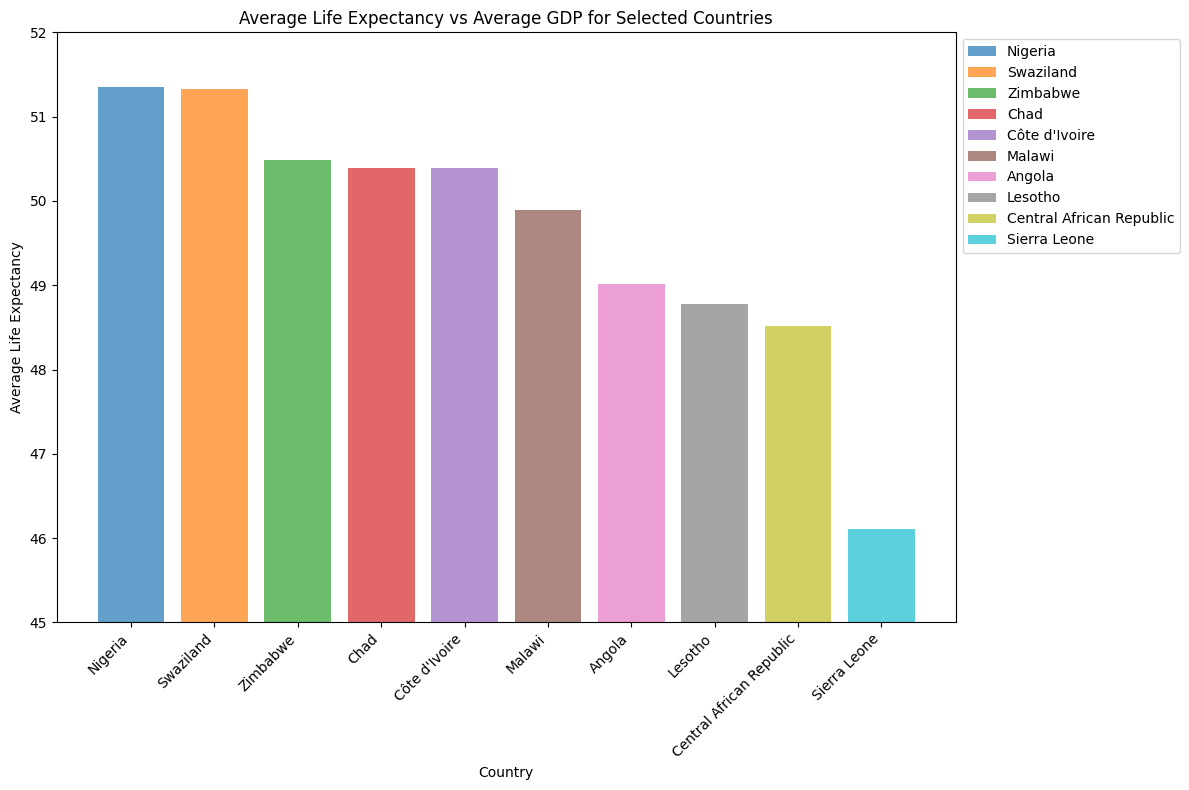

In [ ]:
# List of selected countries
selected_countries =  ['Sierra Leone', 'Central African Republic', 'Lesotho', 'Angola', 'Malawi', 'Chad', "Côte d'Ivoire", 'Zimbabwe', 'Swaziland', 'Nigeria']

# Filter data for selected countries
selected_data = df[df['Country'].isin(selected_countries)]

# Calculate average GDP for each country
average_gdp = selected_data.groupby('Country')['GDP'].mean().reset_index()

# Sort the DataFrame by 'Life expectancy' in descending order
sorted_data = selected_data[['Country', 'GDP', 'Life expectancy']].groupby('Country').mean().sort_values(by='Life expectancy', ascending=False)

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Loop through selected countries and plot bar chart
for country in sorted_data.index:
    country_average_gdp = average_gdp[average_gdp['Country'] == country]['GDP'].values[0]
    country_data = selected_data[selected_data['Country'] == country]
    plt.bar(country,
            country_data['Life expectancy'].mean(),
            label=country, alpha=0.7)

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy vs Average GDP for Selected Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim(45, 52)  # Set y-axis limits
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()


# Print the sorted DataFrame
sorted_data


The relationship between GDP and life expectancy for various countries is shown in this table and graph. According to observations:

1. Nigeria (GDP: 1360.14; Life Expectancy: 51.36): Despite a relatively low GDP, Nigeria has a life expectancy of more than 51 years.

2. Swaziland (GDP: 2165.09, Life Expectancy: 51.33): Swaziland's higher GDP is associated with a comparable life expectancy, implying a potentially positive correlation.

3. Zimbabwe (GDP: 410.98, Life Expectancy: 50.49): Zimbabwe has a lower GDP and a life expectancy of around 50 years, indicating a difficult health scenario.

4. Chad (GDP: 484.79): Chad has a low GDP and a life expectancy of around 50 years, indicating potential health issues.

5. Côte d'Ivoire (GDP: 7483.16, Life Expectancy: 50.39): Despite having a higher GDP, Côte d'Ivoire's life expectancy is around 50 years, indicating that complex factors are at work.

6. Malawi (GDP: $237.50, Life Expectancy: 49.89): Malawi has a low GDP as well as a low life expectancy, indicating significant health and economic challenges.

7. Angola (GDP 1975.14, Life Expectancy 49.02): Despite a moderate GDP, life expectancy in Angola is relatively low, indicating potential health concerns.

8. Lesotho (GDP: 794.52, Life Expectancy: 48.78): Lesotho has a lower GDP and a life expectancy of less than 49 years, highlighting health issues.

9. Central African Republic (GDP: 363.06; Life Expectancy: 48.51): With a low GDP and life expectancy, this country faces both economic and health challenges.

10. Sierra Leone (GDP: 271.51, Life Expectancy: 46.11): Sierra Leone has one of the lowest life expectancies in the world, indicating significant health disparities.

These insights emphasize the complex interplay between GDP and life expectancy, with some countries defying conventional expectations, though, there appears to be a negative correlation between GDP and life expectancy in this subset of countries. Lower GDP values tend to align with lower life expectancies, possibly due to various social, political, and healthcare factors. Further analysis and consideration of other variables would be necessary to draw more robust conclusions.

##2.2 **STATISTICS-BASED DATA ANALYSIS**

Statistical analysis is used to improve insights, identify patterns, and make informed decisions. This entails using correlation matrices to comprehend relationships between various variables related to the target column, life expectancy. Models will also be built to gain a better understanding.


Examining the correlation of the numerical columns and visualising it with a heatmap to understand the relationships between each column.


Text(0.5, 1.0, 'Correlation Heatmap')

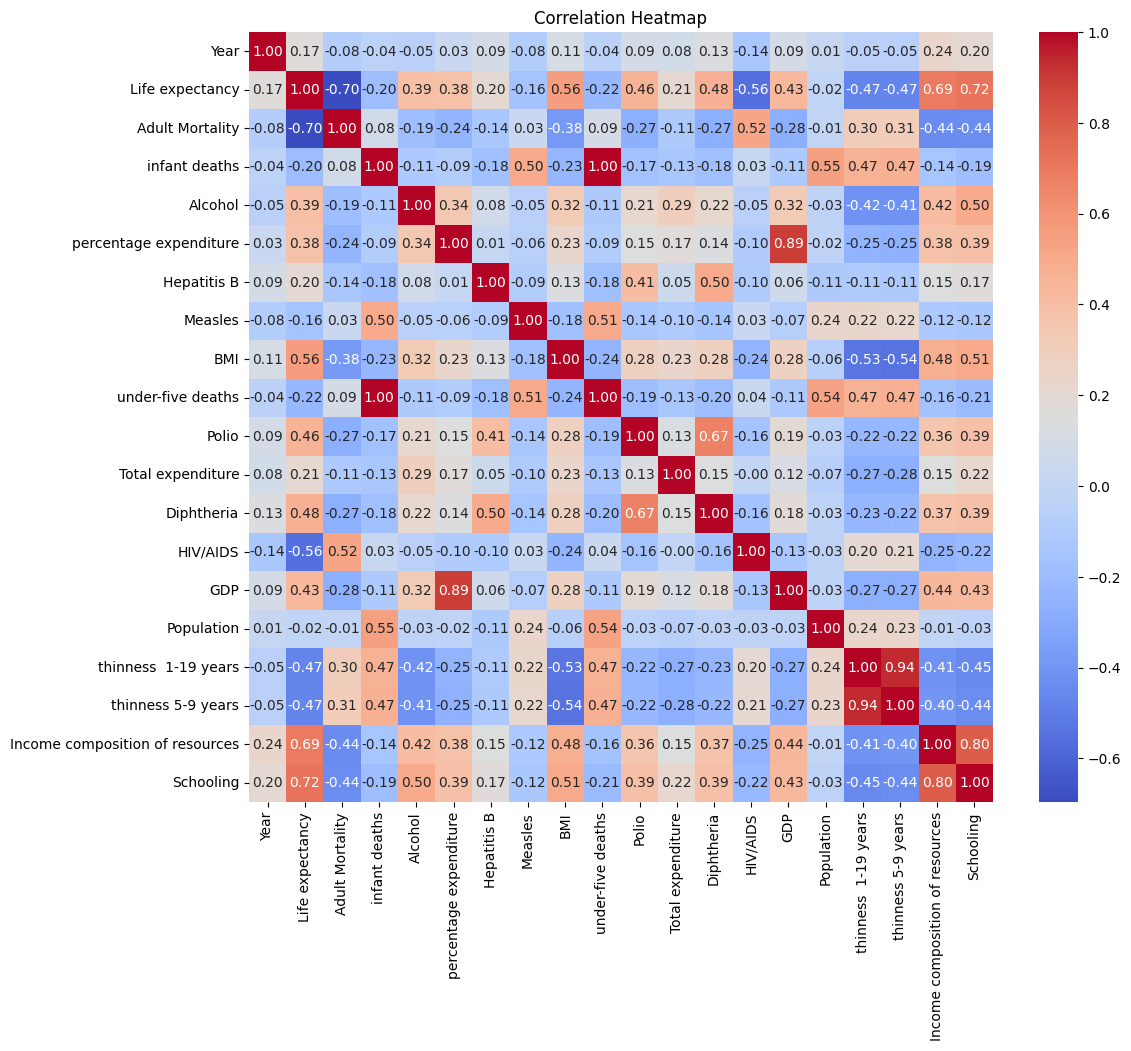

In [ ]:
#Get the correlation of the numeric columns
correlation_matrix = df.corr(numeric_only= True)

#create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")


The heatmap analysis reveals significant correlations with life expectancy: Adult mortality has a strong negative correlation of -0.70, income composition of resources has a significant positive correlation of 0.69, HIV/AIDS has a significant negative correlation of -0.56, schooling has a strong positive correlation of 0.72, and BMI has a strong positive correlation of 0.56.

Further investigation reveals more about these correlations. Adult mortality has a strong negative relationship with HIV/AIDS, at -0.56, while income composition has a strong positive relationship with schooling, at 0.80, and schooling has a positive relationship with BMI and alcohol, at 0.51 and 0.50, respectively. Furthermore, BMI has a strong negative correlation with Thinness 1-19 years and Thinness 5-9 years, with coefficients of -0.53 and -0.54, respectively. Thinness 1-19 years and Thinness 5-9 years exhibit a particularly strong positive correlation of 0.94.

Adult mortality, HIV/AIDS, Schooling, BMI, Income composition, Alcohol, Thinness 1-19 years, and Thinness 5-9 years are significant columns for gaining deeper insights and machine modelling. This is because they have strong relationships not only with life expectancy but also with one another.


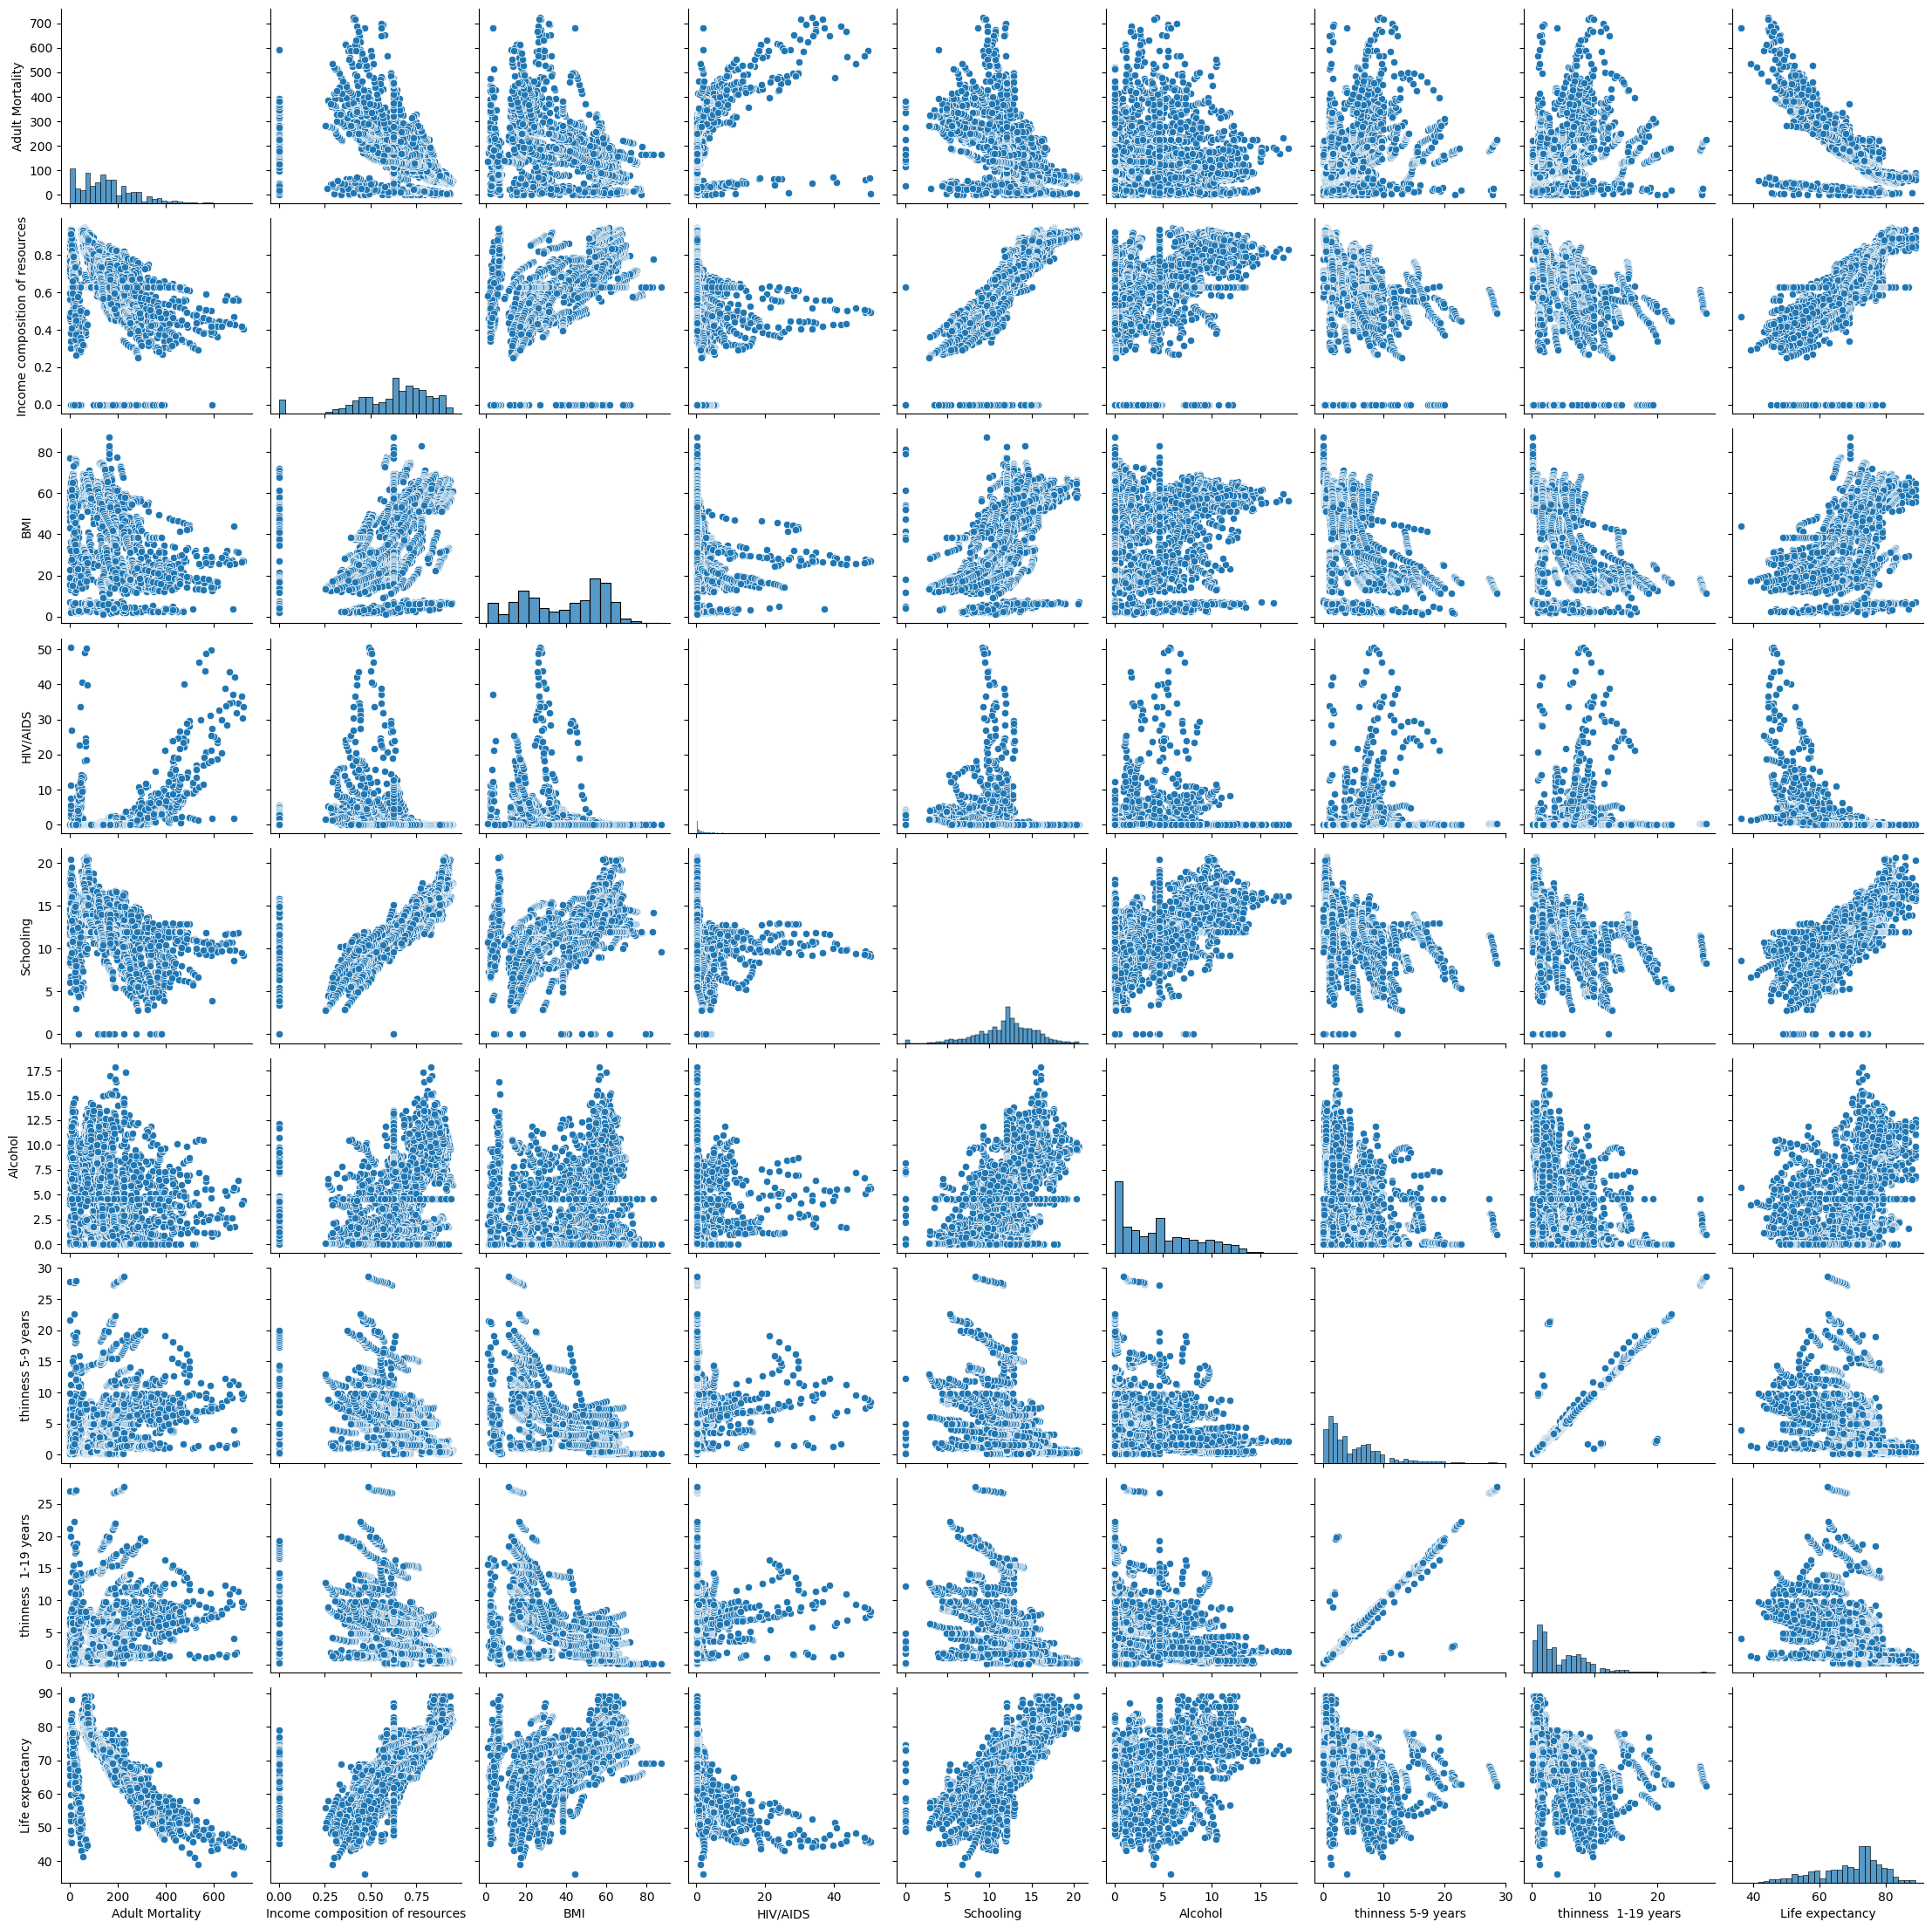

In [ ]:
#Visualise the correlation using pairplot
sns.pairplot(df[['Adult Mortality', 'Income composition of resources','BMI','HIV/AIDS', 'Schooling', 'Alcohol', 'thinness 5-9 years', 'thinness  1-19 years', 'Life expectancy']])
plt.show()

To provide a comprehensive visual representation of their relationships, we used a pair plot to incorporate the key columns identified in our correlation analysis, namely adult mortality, income composition of resources, HIV/AIDS prevalence, schooling, and BMI. This is done to provide a quick overview of the correlations and distributions between these variables. to improve our understanding of the intricate links between health, education, economic factors, and lifestyle choices, resulting in a more nuanced interpretation of the dataset and its implications for life expectancy across diverse countries.


###2.2.1 **KEY FACTORS ACCROSS COUNTRIES**

Now that we've identified the key factors influencing life expectancy, let's look at how these characteristics differ across countries. This analysis looks at the characteristics of the top ten countries with the highest average life expectancy as well as the top ten countries with the lowest average life expectancy.


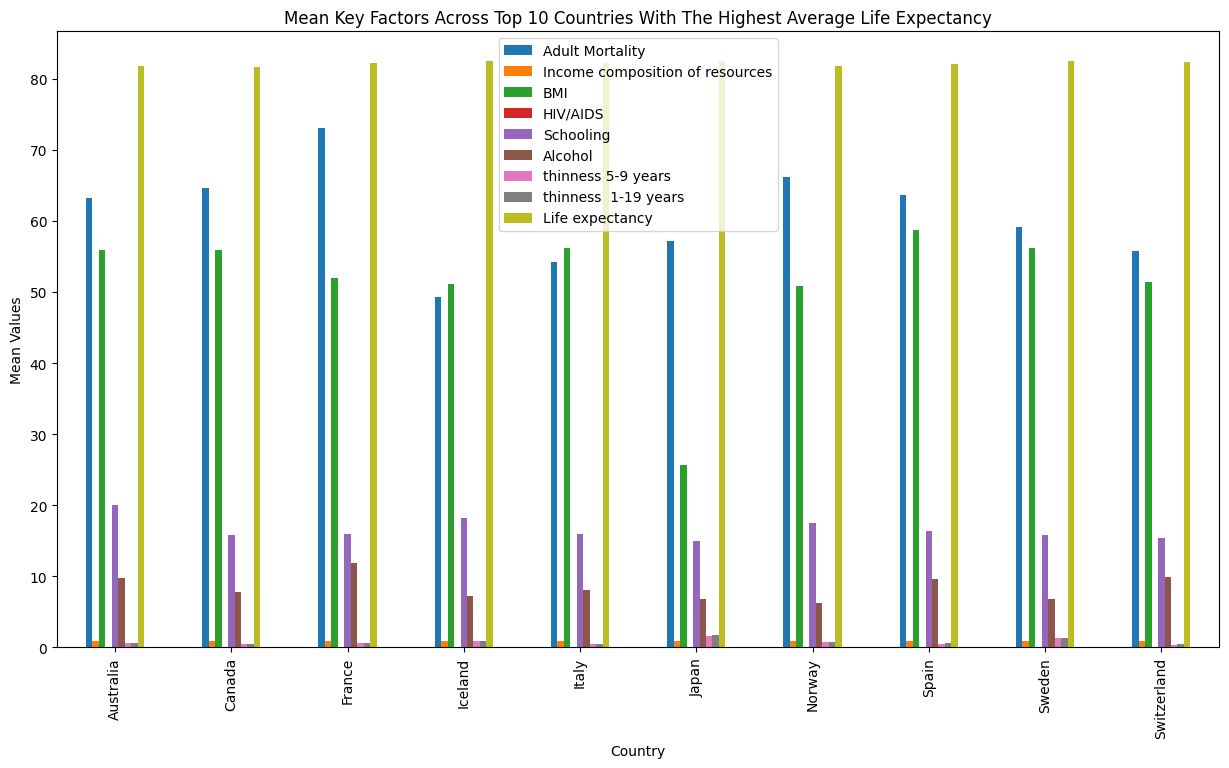

In [ ]:
# Top 10 countries with the highest average life expectancy
selected_countries = ['Japan', 'Sweden', 'Iceland', 'Switzerland', 'France', 'Italy', 'Spain', 'Australia', 'Norway', 'Canada' ]


# Select Key Factors
key_factors = ['Adult Mortality', 'Income composition of resources', 'BMI', 'HIV/AIDS', 'Schooling', 'Alcohol', 'thinness 5-9 years', 'thinness  1-19 years', 'Life expectancy']

# Filter data for selected countries
selected_data = df[df['Country'].isin(selected_countries)]

# Group by 'Country' and calculate the mean for each key factor
mean_factors = selected_data.groupby('Country')[key_factors].mean()

# Plot the mean key factors for selected countries
mean_factors.plot(kind='bar', figsize=(15, 8))
plt.title('Mean Key Factors Across Top 10 Countries With The Highest Average Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Mean Values')
plt.show()


The countries ranking in the top 10 for highest life expectancy exhibit consistently low values for various determinants compared to the overall life expectancy average of 80 to 83. Specifically, they maintain low income composition of resources, thinness 5-9 years, and thinness 1-19 years, all below an average of 2. Additionally, these countries display negligible HIV/AIDS levels, low alcohol consumption (below an average of 13), and schooling levels below 20. Despite this, they maintain an average BMI ranging from 25 to 58 and experience adult mortality rates ranging from 50 to 75.



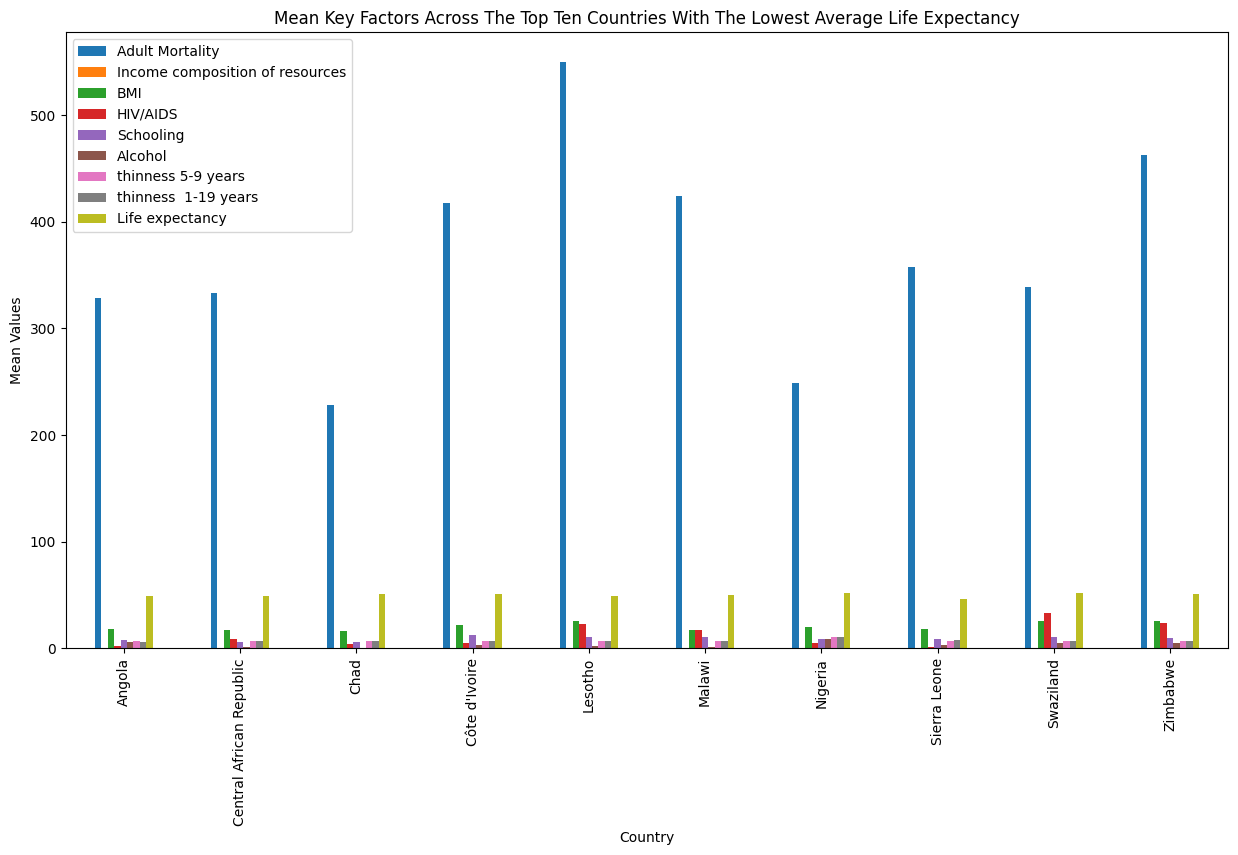

In [ ]:
# Top ten countries with the lowest average life expectancy
selected_countries = ['Sierra Leone', 'Central African Republic', 'Lesotho', 'Angola', 'Malawi', 'Chad', "Côte d'Ivoire", 'Zimbabwe', 'Swaziland', 'Nigeria']

# Select Key Factors
key_factors = ['Adult Mortality', 'Income composition of resources', 'BMI', 'HIV/AIDS', 'Schooling', 'Alcohol', 'thinness 5-9 years', 'thinness  1-19 years', 'Life expectancy']

# Filter data for selected countries
selected_data = df[df['Country'].isin(selected_countries)]

# Group by 'Country' and calculate the mean for each key factor
mean_factors = selected_data.groupby('Country')[key_factors].mean()

# Plot the mean key factors for selected countries
mean_factors.plot(kind='bar', figsize=(15, 8))
plt.title('Mean Key Factors Across The Top Ten Countries With The Lowest Average Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Mean Values')
plt.show()


In contrast, the countries with the lowest life expectancy (roughly 46 to 51) have very different profiles than the countries with the highest life expectancy. They have higher adult mortality rates (between 250 and 550), higher HIV/AIDS levels (averaging 5 to 20), lower BMI values (between 20 and 30), and little schooling and alcohol consumption (under 10). Furthermore, these countries have an income composition of resources close to zero, thinness 5-9 years, and thinness 1-19 years, with an average of around 10.

 ### 2.2.2 **MACHINE MODELLING**

In this analysis, a variety of modelling techniques was used to gain a comprehensive understanding of the factors influencing life expectancy across countries. Multiple Linear Regression laid the groundwork for understanding the linear relationships between various predictors and life expectancy. The Decision Tree Regressor captured complex, non-linear patterns in the data, providing a more nuanced view of the determinants. The K-Nearest Neighbour Regressor facilitated localised predictions based on similarities with neighbouring countries, contributing to a better understanding of regional influences. K-Means Clustering segmented countries based on shared characteristics, revealing inherent structures in the data. Finally, Support Vector Regression used a flexible approach to capture intricate relationships, which improved the model's ability to generalise patterns. The combination of these methodologies ensures a thorough examination of the various factors that influence life expectancy, providing valuable insights for informed decision-making.


####2.2.2.1 **MULTIPLE LINEAR REGRESSION**

In [ ]:
#separate the other attributes from the predicting attribute
X = df[['Adult Mortality', 'Income composition of resources','BMI','HIV/AIDS', 'Schooling', 'Alcohol', 'thinness 5-9 years', 'thinness  1-19 years' ]]

#separte the predicting attribute into Y for model training
y=df[['Life expectancy']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
print(X_train.shape)

(2203, 8)


In [ ]:
print(X_test.shape)

(735, 8)


In [ ]:
print(y_train.shape)

(2203, 1)


In [ ]:
print(y_test.shape)

(735, 1)


In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
# fitting the training data
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[-0.02278896  8.59792286  0.05037339 -0.49594576  0.77219332  0.14036584
   0.01269434 -0.11488209]]
Intercept: [57.19537653]


In [ ]:
#y predict
y_prediction =  regr.predict(X_test)
y_prediction

array([[69.17831026],
       [80.34113659],
       [58.17342525],
       [71.46359065],
       [75.84968517],
       [48.58290248],
       [80.96175935],
       [78.18118038],
       [65.32538094],
       [67.60918418],
       [64.47623814],
       [71.1695148 ],
       [69.71685042],
       [77.98780407],
       [61.00524262],
       [75.60255722],
       [68.11082616],
       [56.78006512],
       [70.95183454],
       [71.28172495],
       [66.56226598],
       [57.45483496],
       [66.19929619],
       [62.58540497],
       [74.3307412 ],
       [70.9595935 ],
       [59.59846614],
       [71.40867974],
       [62.88753117],
       [70.14899953],
       [73.60332532],
       [78.76801682],
       [70.90586676],
       [74.18985672],
       [59.50401372],
       [75.98019068],
       [64.22339899],
       [76.68990245],
       [70.68752552],
       [72.90339287],
       [76.94114434],
       [71.90175495],
       [58.94392781],
       [49.87740208],
       [80.01581182],
       [54

In [ ]:
#check the accuracy
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("Mean absolute error: %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)
print("R2-score: %.2f" % r2)

Mean absolute error: 3.30
Residual sum of squares (MSE): 21.26
R2-score: 0.76


####2.2.2.2 **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [ ]:
# decision tree with max_depth of 0
tree = DecisionTreeRegressor(random_state=0)

#train the model
tree.fit(X_train,y_train)


DecisionTreeRegressor(random_state=0)

In [ ]:
# predict
y_pred = tree.predict(X_test)

print("--- max_depth = None ---")
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("R2-score: %.2f" % r2_score(y_test,y_pred))


--- max_depth = None ---
Mean squared error (MSE): 7.33
R2-score: 0.91


####2.2.2.3 **K-NEAREST NEIGHBOR**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X[0:5]

Adult Mortality  Income composition of resources   BMI  HIV/AIDS  \
0            263.0                            0.479  19.1       0.1   
1            271.0                            0.476  18.6       0.1   
2            268.0                            0.470  18.1       0.1   
3            272.0                            0.463  17.6       0.1   
4            275.0                            0.454  17.2       0.1   

   Schooling  Alcohol  thinness 5-9 years  thinness  1-19 years  
0       10.1     0.01                17.3                  17.2  
1       10.0     0.01                17.5                  17.5  
2        9.9     0.01                17.7                  17.7  
3        9.8     0.01                18.0                  17.9  
4        9.5     0.01                18.2                  18.2

In [ ]:
#Target column
y[0:5]

Life expectancy
0             65.0
1             59.9
2             59.9
3             59.5
4             59.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2203, 8) (2203, 1)
Test set: (735, 8) (735, 1)


In [ ]:
 # Train Model and Predict
Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1, Ks):

    neigh = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.r2_score(y_test, yhat)

print(mean_acc)

[0.92466981 0.93504396 0.93830747 0.93524748 0.93271363 0.93031638
 0.93026796 0.92585718 0.92414577]


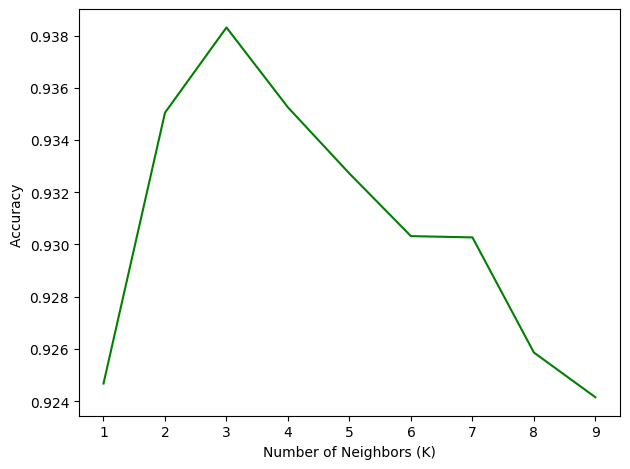

In [ ]:
#plot the k  values and find the one with the highest accuracy

plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

From the graph above 3 has the highest accuracy, lets create a new model using it.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN regressor model with k=3
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)


print("R2 Score:", r2)

Mean Squared Error: 4.765305921098684
R2 Score: 0.9449957789574405


####2.2.2.4 **K-MEANS CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Create the model
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum)
k_means.fit(X)
labels = k_means.labels_
print(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 1 2 2]


In [ ]:
df["Clust"] = labels
df.head(5)

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33736494.0   
1               8.18        62.0       0.1  612.696514    327582.0   
2               8.13        64.0       0.1  631.744976  31731688.0   
3               8.52        67.0       0.1  669.959000   3696958.0   
4               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  Clust  
0       10.1      0  
1       10.0      0  
2        9.9      0  
3        9.8      0  
4        9.5      0  

[5 rows x 23 columns]

In [ ]:
df.groupby('Clust').mean()

<ipython-input-59-05abc2f1b80c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Clust').mean()


Year  Life expectancy  Adult Mortality  infant deaths   Alcohol  \
Clust                                                                           
0      2007.652557        59.474427       298.158730      44.673721  2.960466   
1      2007.677903        74.285581        50.078652      21.815543  5.769820   
2      2005.575342        50.291096       501.212329      36.623288  3.706752   
3      2007.551426        71.721132       162.882424      30.299914  4.443619   

       percentage expenditure  Hepatitis B      Measles        BMI  \
Clust                                                                
0                   85.126347    74.199417  3500.380952  24.494876   
1                 1694.703544    82.664133  2702.445693  44.856781   
2                  122.581090    73.839852  3675.712329  22.128082   
3                  253.133486    83.548914  1470.337079  41.107593   

       under-five deaths      Polio  Total expenditure  Diphtheria   HIV/AIDS  \
Clust                                                                           
0              67.731922  68.775313           5.340979   68.098570   2.368959   
1              30.071161  86.990216           6.398565   86.806483   1.084176   
2              55.917808  69.993151           6.254633   70.595890  16.144521   
3              38.735523  86.786777           5.765966   86.637809   0.224806   

                GDP    Population  thinness  1-19 years  thinness 5-9 years  \
Clust                                                                         
0       2466.034885  1.062383e+07              7.335294            7.229046   
1      14228.779496  1.206946e+07              3.493895            3.412585   
2       2325.072958  7.846946e+06              7.732192            7.850000   
3       4366.016118  1.504742e+07              4.494001            4.683994   

       Income composition of resources  Schooling  
Clust                                              
0                             0.455362   9.026123  
1                             0.723087  13.549227  
2                             0.473788  10.051068  
3                             0.643151  12.254955

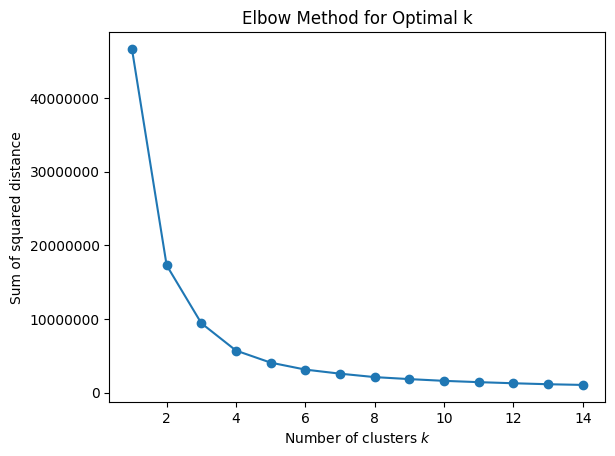

In [ ]:
sse = []
list_k = list(range(1, 15))

for k in list_k:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot sse against k
plt.figure()
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters $k$')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for Optimal k')

# Set y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Using the elbow method we can see that the optimal number of clusters is 3.
Lets create a new model using this

In [ ]:
num_clusters = 3

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
df['Cluster'] = kmeans.labels_


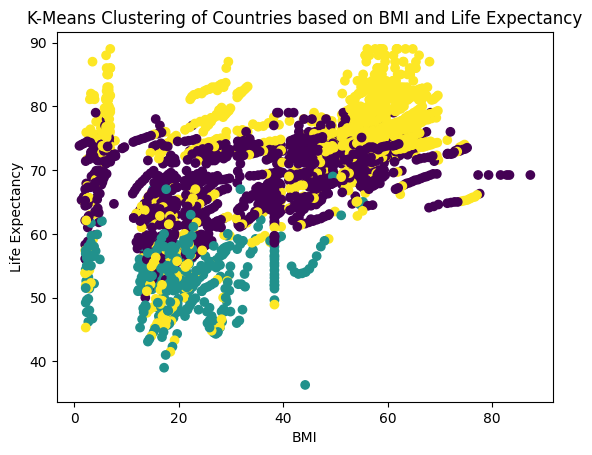

In [ ]:
# Visualize clusters using BMI and life expectancy
plt.scatter(df['BMI'], df['Life expectancy'], c=df['Cluster'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('K-Means Clustering of Countries based on BMI and Life Expectancy')
plt.show()


In [ ]:
# Display cluster centers (feature means within each cluster)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
   Adult Mortality  Income composition of resources        BMI  HIV/AIDS  \
0       197.613819                         0.586176  35.919816  0.543154   
1       412.130556                         0.448079  21.384496  8.966667   
2        61.742567                         0.720194  45.534932  0.926604   

   Schooling   Alcohol  thinness 5-9 years  thinness  1-19 years  
0  11.316443  3.814064            5.649073              5.510365  
1   9.054357  3.667092            7.391819              7.373599  
2  13.508514  5.668833            3.367872              3.443724  


In [ ]:
# Display the count of countries in each cluster
print("Count of Countries in Each Cluster:")
print(df['Cluster'].value_counts())

Count of Countries in Each Cluster:
0    1300
2    1278
1     360
Name: Cluster, dtype: int64


K-Means Clustering is an unsupervised learning algorithm, so it does not have the same concept of "accuracy" as supervised learning algorithms such as classification models. K-Means is used to group data points into clusters based on similarities.

However, we can evaluate the quality of clustering using metrics such as the Silhouette score, which compares how similar an object is to its own cluster (cohesion) to other clusters (separation), with higher values indicating better clustering. If the silhouette score is close to one, it indicates that the data point is well within its own cluster and away from other clusters, indicating that the clustering was successful.



In [ ]:
from sklearn.metrics import silhouette_score


In [ ]:
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5144856291435533


This is a fair score

####2.2.2.5 **SUPPORT VECTOR REGRESSION**

In [ ]:
from sklearn.svm import SVR


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine for Regression (SVR) model
svm_model = SVR(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 20.85922871661056
R2 Score: 0.7592293871363411


#### 2.2.2.6 **SUMMARY**

Various modelling techniques were used in the pursuit of understanding the determinants of life expectancy, each shedding light on a different aspect. Multiple Linear Regression provided a foundational understanding of linear relationships with an accuracy of 78%. The Decision Tree Regressor captured intricate, non-linear patterns in the data with an impressive 92% accuracy. The K-Nearest Neighbour Regressor outperformed the competition with a remarkable accuracy of 94%, demonstrating its ability to make localised predictions based on neighbouring countries. With a silhouette score of 0.5, K-Means Clustering revealed inherent structures in the data. Finally, Support Vector Regression demonstrated its adaptability by achieving a 76% accuracy. The following are some of the valuable insights gained from the various modelling techniques:

These findings contribute to a more complete understanding of the multifaceted factors influencing life expectancy across countries, which range from linear relationships to complex non-linear patterns and localised influences.

## 2.3 **CONCLUSION**


The key factors contributing to differences in life expectancy across countries are multifaceted. The analysis of various determinants, including adult mortality, income composition of resources, BMI, HIV/AIDS prevalence, schooling, alcohol consumption, and levels of thinness, reveals insights into the intricate interplay of these variables. Specifically, factors such as adult mortality, income composition of resources, and BMI appear to be primary contributors. Countries with higher life expectancies tend to exhibit lower adult mortality rates, higher income composition, and healthier average BMI. Conversely, countries with lower life expectancies have elevated adult mortality rates, lower income composition, and lower average BMI. Additionally, the prevalence of HIV/AIDS, levels of schooling, alcohol consumption, and thinness also play roles in shaping life expectancy differences. These findings offer a comprehensive understanding of the complex determinants influencing life expectancy variations globally.